In [ ]:
#First, I install all the libraries needed to get Tesla shares
!pip install yfinance
!pip install pandas
!pip install plotly

In [1]:
#Then import functions specificaly for this task
import yfinance as yf
import pandas as pd
import plotly.express as px

In [8]:
#Here I'm using yfinance API to get Tesla Stock Data from https://finance.yahoo.com/
Tesla = yf.Ticker("TSLA")
#And here it is converted to a data frame using.history method
tesla_stock=Tesla.history(period="1y")
tesla_stock.reset_index(inplace=True)
tesla_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-09-20 00:00:00-04:00,306.910004,313.329987,305.579987,308.730011,61642800,0,0
1,2022-09-21 00:00:00-04:00,308.290009,313.799988,300.630005,300.799988,62555700,0,0
2,2022-09-22 00:00:00-04:00,299.859985,301.290009,285.820007,288.589996,70545400,0,0
3,2022-09-23 00:00:00-04:00,283.089996,284.500000,272.820007,275.329987,63748400,0,0
4,2022-09-26 00:00:00-04:00,271.829987,284.089996,270.309998,276.010010,58076900,0,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



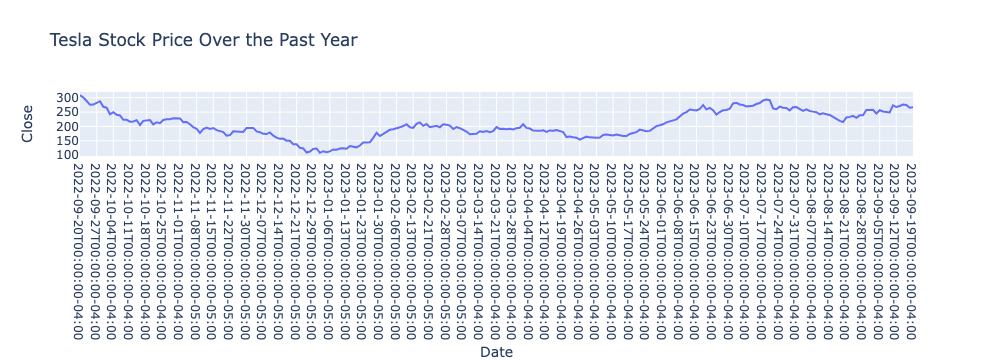

In [33]:
#It's time to have fun and explore interactive chart, to see how Tesla's doing. Would you invest?
fig=px.line(tesla_stock, x="Date", y="Close", title="Tesla Stock Price Over the Past Year")
fig.update_yaxes(
fig.update_xaxes(type="category")

In [ ]:
#Here we install all the necessary libraries to get Tesla revenue info
!pip install bs4
!pip install html5lib
!pip install pandas
!pip install plotly

In [17]:
#It is important to load all functions needed for webscrapping and visualisation
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px

In [19]:
#Here we use .get method to access the website content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [90]:
#With a little help of tags and HTML knowledge we can cook...beautiful soup!
soup = BeautifulSoup(html_data)
rows = soup.find("tbody").find_all("tr")
tesla_revenue = []
for row in rows:
    columns = row.find_all("td")
    date = columns[0].text
    revenue = columns[1].text
    tesla_revenue.append({"Date":date, "Revenue, in million USD":revenue})
tesla_revenue = pd.DataFrame(tesla_revenue)
tesla_revenue["Revenue, in billion USD"] = pd.to_numeric(tesla_revenue["Revenue, in million USD"].str.replace(",|\$|", "", regex=True)) / 1000
tesla_revenue.dropna=True
tesla_revenue

,Date,"Revenue, in million USD","Revenue, in billion USD"
0,2021,"$53,823",53.823
1,2020,"$31,536",31.536
2,2019,"$24,578",24.578
3,2018,"$21,461",21.461
4,2017,"$11,759",11.759
5,2016,"$7,000",7.000
6,2015,"$4,046",4.046
7,2014,"$3,198",3.198
8,2013,"$2,013",2.013
9,2012,$413,0.413


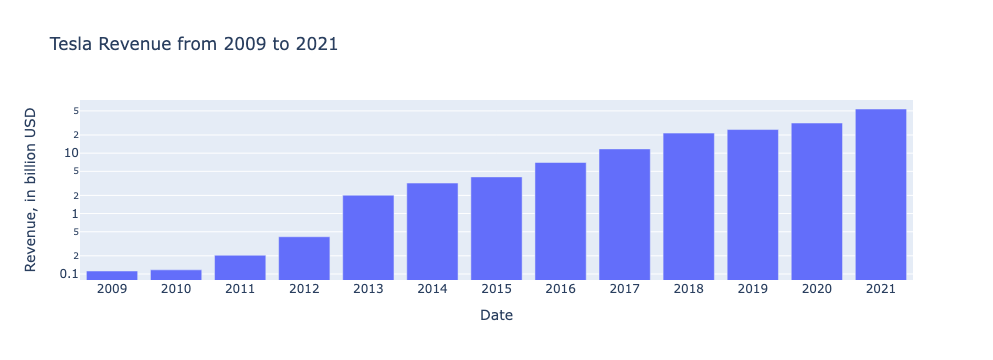

In [89]:
#It's time to see how good is Tesla in terms of profitability...and make final decision:invest or not invest!
tesla_revenue = tesla_revenue[::-1]
fig = px.bar(tesla_revenue, x='Date', y='Revenue, in billion USD', title='Tesla Revenue from 2009 to 2021')
fig.update_xaxes(type='category')
fig.update_yaxes(type="log")  
fig.show()